CUSTOMER CHURN PREDICTION


In [26]:
#importing all useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
# Load the dataset
df = pd.read_csv("churn_dataset.csv")

# Display first few rows
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [30]:
df.shape

(64374, 12)

In [32]:
df.drop(columns =["CustomerID"],inplace=True)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [34]:
# Check for missing values
print(df.isnull().sum())


Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [36]:
# Check for duplicate records
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [38]:
# Get statistical summary
print(df.describe())

                Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction         Churn  
count   64374.000000  64374.000000      64374.000000  64374.000000  
mean       17.133952    541.023379         15.498850      0.473685  
std         8.852211    260.874809          8.638436      0.499311  
min         0.000000    100.000000          1.000000      0.000000  
25%        10.000000    313.00000

In [40]:
# Check columns with missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


PERFORMING EDA

In [43]:
cat_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_columns)


Categorical Columns: Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [45]:
label_enc = LabelEncoder()
for col in cat_columns:
    if col != "customerID":  # Exclude customer ID
        df[col] = label_enc.fit_transform(df[col])


/tmp/ipykernel_25915/2226143616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


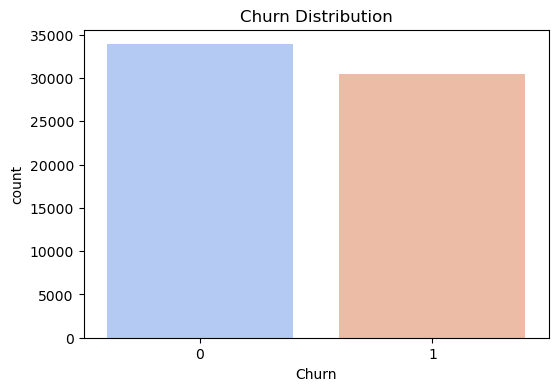

Churn Rate:
Churn
0    52.631497
1    47.368503
Name: proportion, dtype: float64


In [47]:
#step 1
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

# Percentage of Churned vs Not Churned
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")


/tmp/ipykernel_25915/1602302355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipykernel_25915/1602302355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipykernel_25915/1602302355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


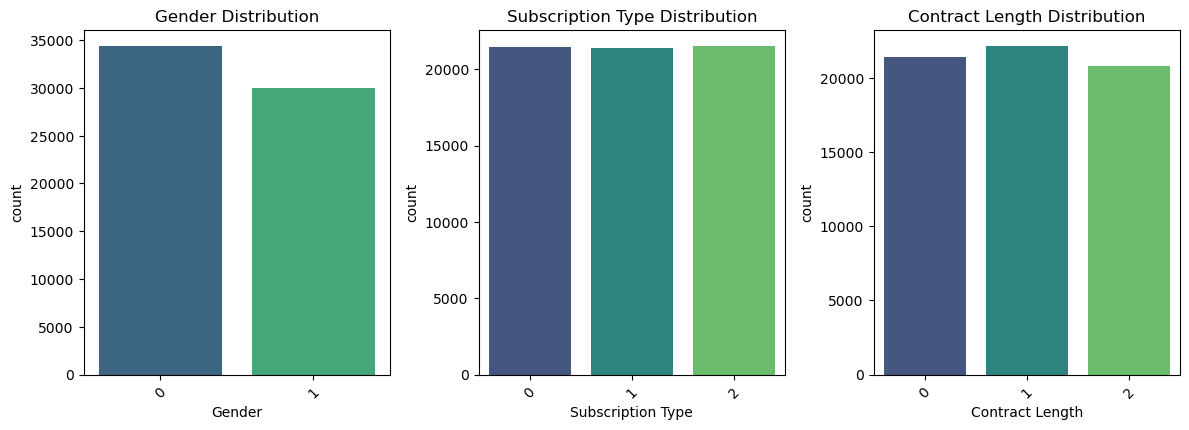

In [49]:
# Step 2: Distribution of Categorical Variables
plt.figure(figsize=(12, 8))
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

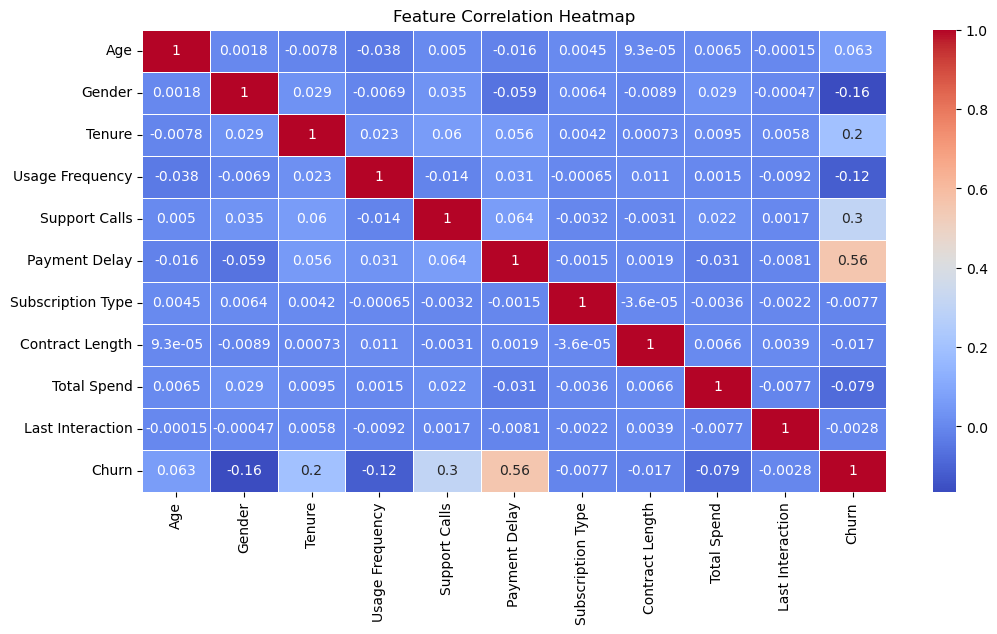

In [51]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



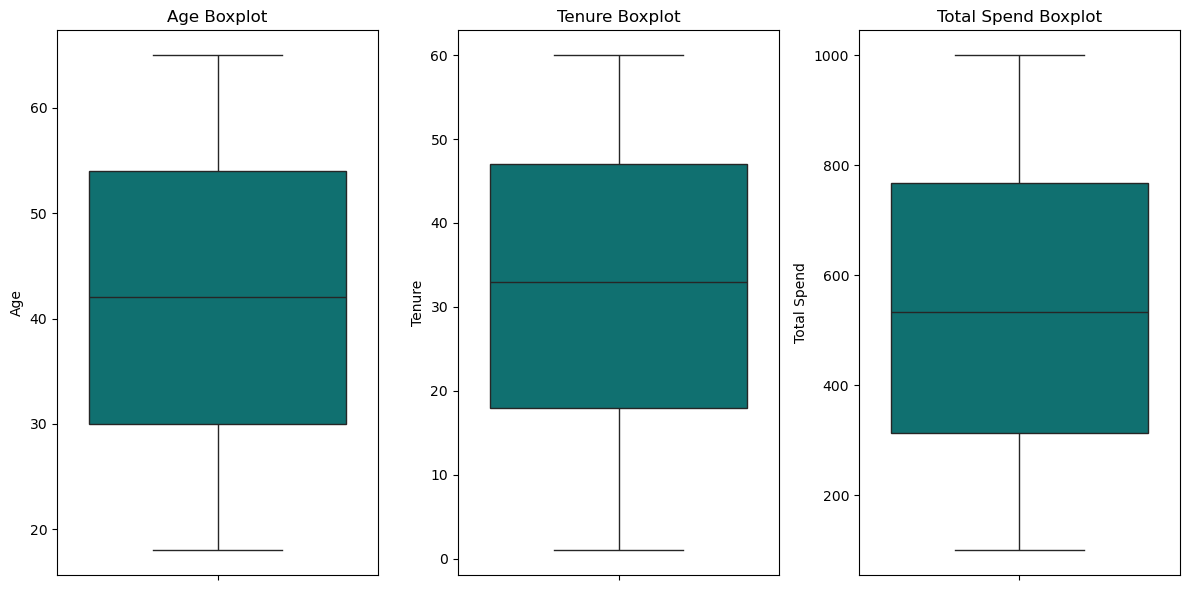

In [53]:
# Step 4: Boxplots for Numerical Features (e.g., Age, Tenure, Total Spend)
numerical_features = ['Age', 'Tenure', 'Total Spend']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='teal')
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()


/tmp/ipykernel_25915/3848332124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Age", data=df, palette="coolwarm")


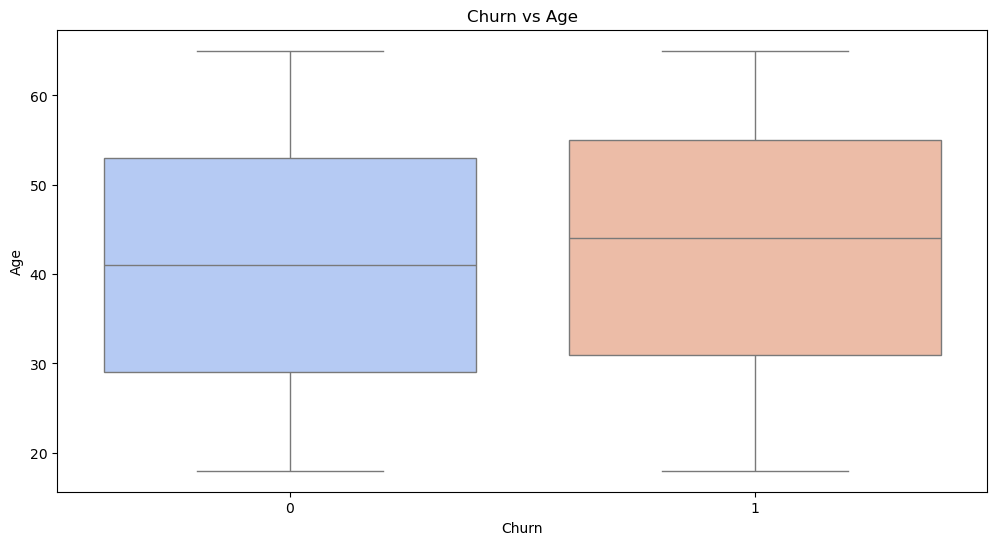

/tmp/ipykernel_25915/3848332124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Tenure", data=df, palette="coolwarm")


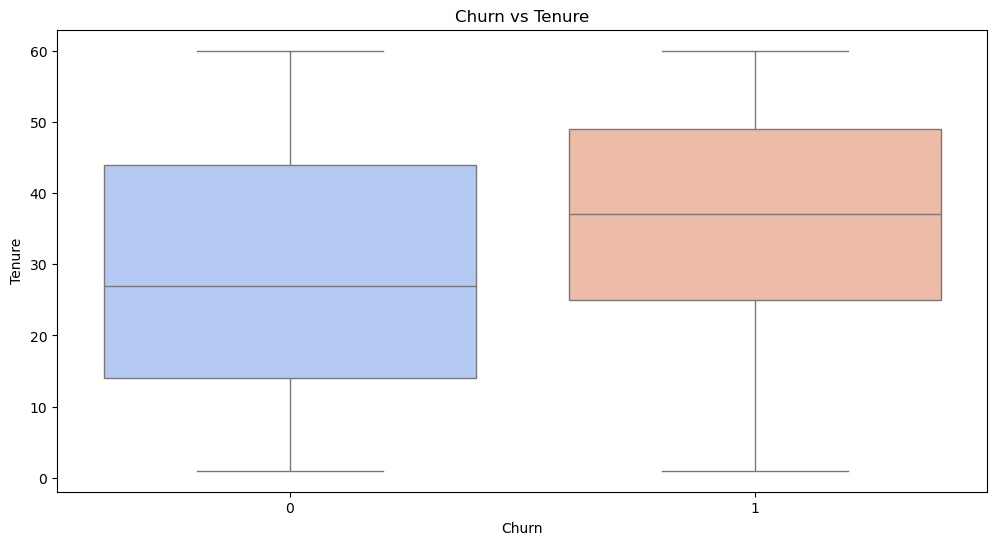

In [55]:
#Step 5: Churn Impact by Key Features
plt.figure(figsize=(12, 6))
sns.boxplot(x="Churn", y="Age", data=df, palette="coolwarm")
plt.title("Churn vs Age")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x="Churn", y="Tenure", data=df, palette="coolwarm")
plt.title("Churn vs Tenure")
plt.show()


MODEL TRAINING AND TESTING

In [66]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Churn"])  # Drop 'Churn' column from features
y = df["Churn"]  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [68]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get classification report
    class_report = classification_report(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": class_report
    }

    print(f"Results for {model_name}:\n")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Classification Report:\n{class_report}")
    print("="*50)


Results for Random Forest:

Accuracy: 99.94%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Results for Logistic Regression:

Accuracy: 83.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



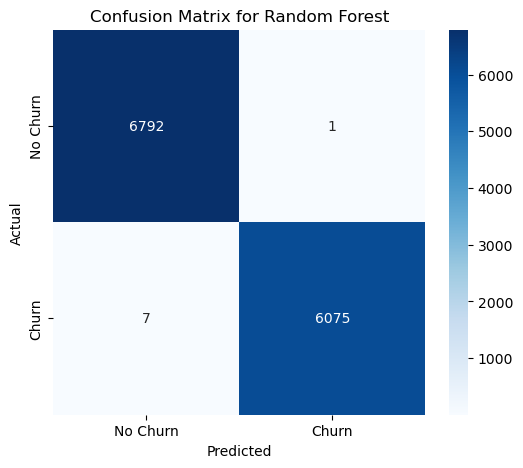

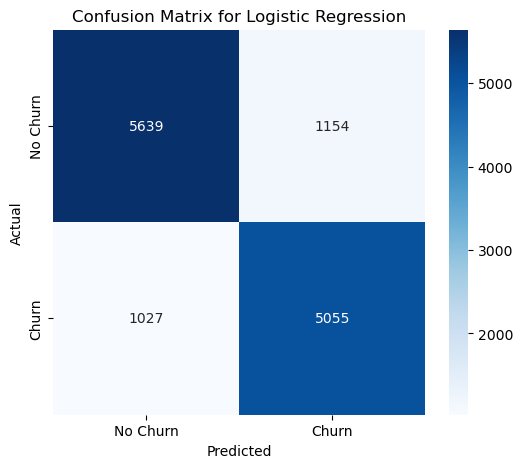

In [70]:
# Visualize Confusion Matrix for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

 RANDOM INPUT AND TESTING 


In [72]:

# Create a DataFrame for the customers
data = {
    'Age': [45, 32],  # Customer 1 will churn, Customer 2 will not churn
    'Gender': ['Female', 'Male'],
    'Tenure': [6, 24],
    'Usage Frequency': [2, 5],
    'Support Calls': [5, 1],
    'Payment Delay': [2, 0],
    'Subscription Type': ['Basic', 'Premium'],
    'Contract Length': [12, 24],
    'Total Spend': [100, 1200],
    'Last Interaction': ['2024-11-01', '2025-01-10']
}

df = pd.DataFrame(data)

# Initialize LabelEncoder for encoding categorical features
label_encoder = LabelEncoder()

# Encode 'Gender' and 'Subscription Type'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Subscription Type'] = label_encoder.fit_transform(df['Subscription Type'])

# Convert 'Last Interaction' to the number of days since last interaction
from datetime import datetime

# Function to convert last interaction to days
def convert_to_days(last_interaction):
    last_interaction_date = datetime.strptime(last_interaction, '%Y-%m-%d')
    today = datetime.today()
    return (today - last_interaction_date).days

df['Last Interaction'] = df['Last Interaction'].apply(convert_to_days)

# Prepare the features for prediction (excluding target column 'Churn')
X = df.drop('Churn', axis=1, errors='ignore')  # Exclude 'Churn' if it's in the df, just for clarity
y = [1, 0]  # Assume customer 1 churns (1), customer 2 does not (0)

# Scaling the features (if you have scaling applied in training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you have a trained model, for example, RandomForest
from sklearn.ensemble import RandomForestClassifier

# Example: Loading the model (replace with your actual model)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)  # Train on your actual training data

# Simulating prediction using a trained model (replace with your actual model)
model = RandomForestClassifier()
model.fit(X_scaled, y)  # Fit the model on the scaled data (just for testing, replace with your actual model)

# Make prediction
predictions = model.predict(X_scaled)

# Output predictions
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Customer {i+1} will churn.")
    else:
        print(f"Customer {i+1} will not churn.")


Customer 1 will churn.
Customer 2 will not churn.
